In [62]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [63]:
df = pd.read_csv('DF_AVG_NEW_COMM.csv')

In [64]:
df

,NODE_A,NODE_B,WEIGHT,INDUSTRY,TRIANGLES_AVG,CL_COEF_AVG,DEGREE_AVG,DEGREE_CENTR_AVG,EIGENVECTOR_CENTR_AVG,PAGERANK_CENTR_AVG,...,9_26,9_27,9_28,9_29,9_30,9_32,9_33,9_35,9_36,9_9
0,PERMASTEELISA,SALINI SPA,2,135,133.0,0.131947,40.0,0.002690,7.853531e-03,0.000471,...,0,0,0,0,0,0,0,0,0,0
1,PERMASTEELISA,YOOX NET-A-PORTER GROUP,2,6,620.5,0.112316,98.0,0.006590,1.332161e-02,0.000831,...,0,0,0,0,0,0,0,0,0,0
2,PERMASTEELISA,SOMEC SPA,2,135,5.0,0.075758,7.5,0.000504,5.686113e-04,0.000076,...,0,0,0,0,0,0,0,0,0,0
3,PERMASTEELISA,RIZZANI DE ECCHER,2,11,8.5,0.309091,9.0,0.000605,6.138685e-04,0.000077,...,0,0,0,0,0,0,0,0,0,0
4,PERMASTEELISA,RAZORFISH HEALTHWARE,2,4,6.5,0.575758,7.5,0.000504,8.033997e-04,0.000067,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43914,NESMA TRADING CO. LTD.,NESMA & PARTNERS,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0
43915,SB COSTRUZIONI SRL,NESMA & PARTNERS,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0
43916,SB COSTRUZIONI SRL,TUNNELLING SRL,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0
43917,TUNNELLING SRL,NESMA & PARTNERS,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0


In [65]:
del df["COMM_UN"]
print (df.columns[:])

Index(['NODE_A', 'NODE_B', 'WEIGHT', 'INDUSTRY', 'TRIANGLES_AVG',
       'CL_COEF_AVG', 'DEGREE_AVG', 'DEGREE_CENTR_AVG',
       'EIGENVECTOR_CENTR_AVG', 'PAGERANK_CENTR_AVG',
       ...
       '9_26', '9_27', '9_28', '9_29', '9_30', '9_32', '9_33', '9_35', '9_36',
       '9_9'],
      dtype='object', length=1374)


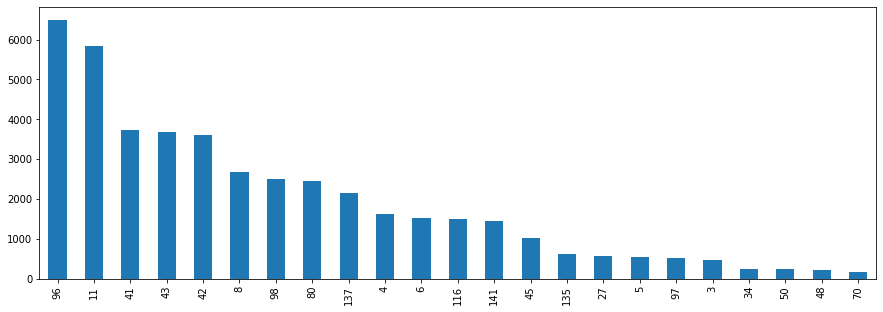

In [94]:
df['INDUSTRY'].value_counts().plot(kind='bar', 
                                   title='', figsize=(15, 5))
plt.show()

In [5]:
del df["NODE_A"]
del df["NODE_B"]

In [6]:
df

,WEIGHT,INDUSTRY,TRIANGLES_AVG,CL_COEF_AVG,DEGREE_AVG,DEGREE_CENTR_AVG,EIGENVECTOR_CENTR_AVG,PAGERANK_CENTR_AVG,CLOSENESS_CENTR_AVG,HARMONIC_CENTR_AVG,...,9_26,9_27,9_28,9_29,9_30,9_32,9_33,9_35,9_36,9_9
0,2,135,133.0,0.131947,40.0,0.002690,7.853531e-03,0.000471,0.275840,4320.517857,...,0,0,0,0,0,0,0,0,0,0
1,2,6,620.5,0.112316,98.0,0.006590,1.332161e-02,0.000831,0.288054,4545.751190,...,0,0,0,0,0,0,0,0,0,0
2,2,135,5.0,0.075758,7.5,0.000504,5.686113e-04,0.000076,0.230986,3559.308929,...,0,0,0,0,0,0,0,0,0,0
3,2,11,8.5,0.309091,9.0,0.000605,6.138685e-04,0.000077,0.241638,3738.197619,...,0,0,0,0,0,0,0,0,0,0
4,2,4,6.5,0.575758,7.5,0.000504,8.033997e-04,0.000067,0.243272,3763.435714,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43914,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,0.000202,3.000000,...,0,0,0,0,0,0,0,0,0,0
43915,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,0.000202,3.000000,...,0,0,0,0,0,0,0,0,0,0
43916,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,0.000202,3.000000,...,0,0,0,0,0,0,0,0,0,0
43917,2,48,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,0.000202,3.000000,...,0,0,0,0,0,0,0,0,0,0


# SECTORS

## Split Training and Test

In [7]:
class_name = "INDUSTRY"

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## Grid Search

In [8]:
param_list = {'criterion': ["gini", "entropy"],
              'class_weight': ["balanced_subsample", "balanced"],
              #'n_estimators':[None] + list(np.arange(2, 300, 10))
             }
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_list , scoring = "accuracy")
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5581360048573163
F1-score [0.33777778 0.37262357 0.33463035 0.4188862  0.61789601 0.56651258
 0.5480226  0.45333333 0.56353591 0.73235686 0.42542543 0.36244541
 0.496      0.31666667 0.19565217 0.59919028 0.59479383 0.61736334
 0.6281337  0.61159063 0.36260623 0.54561404 0.52603471]
              precision    recall  f1-score   support

           3       0.45      0.27      0.34       140
           4       0.48      0.30      0.37       484
           5       0.44      0.27      0.33       160
           6       0.47      0.38      0.42       460
           8       0.60      0.64      0.62       804
          11       0.52      0.63      0.57      1755
          27       0.53      0.57      0.55       170
          34       0.46      0.45      0.45        76
          41       0.51      0.64      0.56      1122
          42       0.71      0.76      0.73      1084
          43       0.47      0.39      0.43      1101
          45       0.55      0.27      0.36       307
  

In [9]:
clf

RandomForestClassifier(class_weight='balanced')

## DecisionTree

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4711596842744384
F1-score [0.27407407 0.25319149 0.29166667 0.34482759 0.52852459 0.51320967
 0.40597015 0.33112583 0.44088889 0.65558633 0.34591195 0.28282828
 0.368      0.28       0.21568627 0.49082257 0.55660848 0.51343284
 0.56350741 0.47502775 0.23661972 0.42225859 0.44653349]
              precision    recall  f1-score   support

           3       0.28      0.26      0.27       140
           4       0.26      0.25      0.25       484
           5       0.28      0.31      0.29       160
           6       0.34      0.35      0.34       460
           8       0.56      0.50      0.53       804
          11       0.51      0.52      0.51      1755
          27       0.41      0.40      0.41       170
          34       0.33      0.33      0.33        76
          41       0.44      0.44      0.44      1122
          42       0.66      0.65      0.66      1084
          43       0.34      0.35      0.35      1101
          45       0.29      0.27      0.28       307
  

## Random Forest

In [1]:
Accuracy_Gini= []
Accurcy_Tree = []

lista = [1,25,50,75,100,125,150,175,200,225,250,275,300]

for i in lista: 
        clf = RandomForestClassifier(n_estimators=i, class_weight='balanced')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Accuracy_Gini.append((accuracy_score(y_test, y_pred)))
        Accurcy_Tree.append(0.4711596842744384)
        
l = lista

NameError: name 'RandomForestClassifier' is not defined

In [2]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=l, y=Accuracy_Gini,
                    mode='lines',
                    name='Gini'))
fig.add_trace(go.Scatter(x=l, y=Accurcy_Tree,
                    mode='lines',
                    name='Decision Tree'))
fig.show()

NameError: name 'go' is not defined

In [17]:
clf = RandomForestClassifier(n_estimators=209, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

Accuracy 0.5587431693989071
F1-score [0.36283186 0.35142119 0.36078431 0.44308446 0.62027594 0.56749025
 0.5480226  0.47435897 0.55884645 0.7323818  0.41666667 0.35033259
 0.48062016 0.29457364 0.20454545 0.6113002  0.59041591 0.62135922
 0.63004172 0.60858896 0.3480663  0.55208333 0.54594595]
              precision    recall  f1-score   support

           3       0.48      0.29      0.36       140
           4       0.47      0.28      0.35       484
           5       0.48      0.29      0.36       160
           6       0.51      0.39      0.44       460
           8       0.60      0.64      0.62       804
          11       0.52      0.62      0.57      1755
          27       0.53      0.57      0.55       170
          34       0.46      0.49      0.47        76
          41       0.50      0.64      0.56      1122
          42       0.71      0.76      0.73      1084
          43       0.48      0.37      0.42      1101
          45       0.55      0.26      0.35       307
  

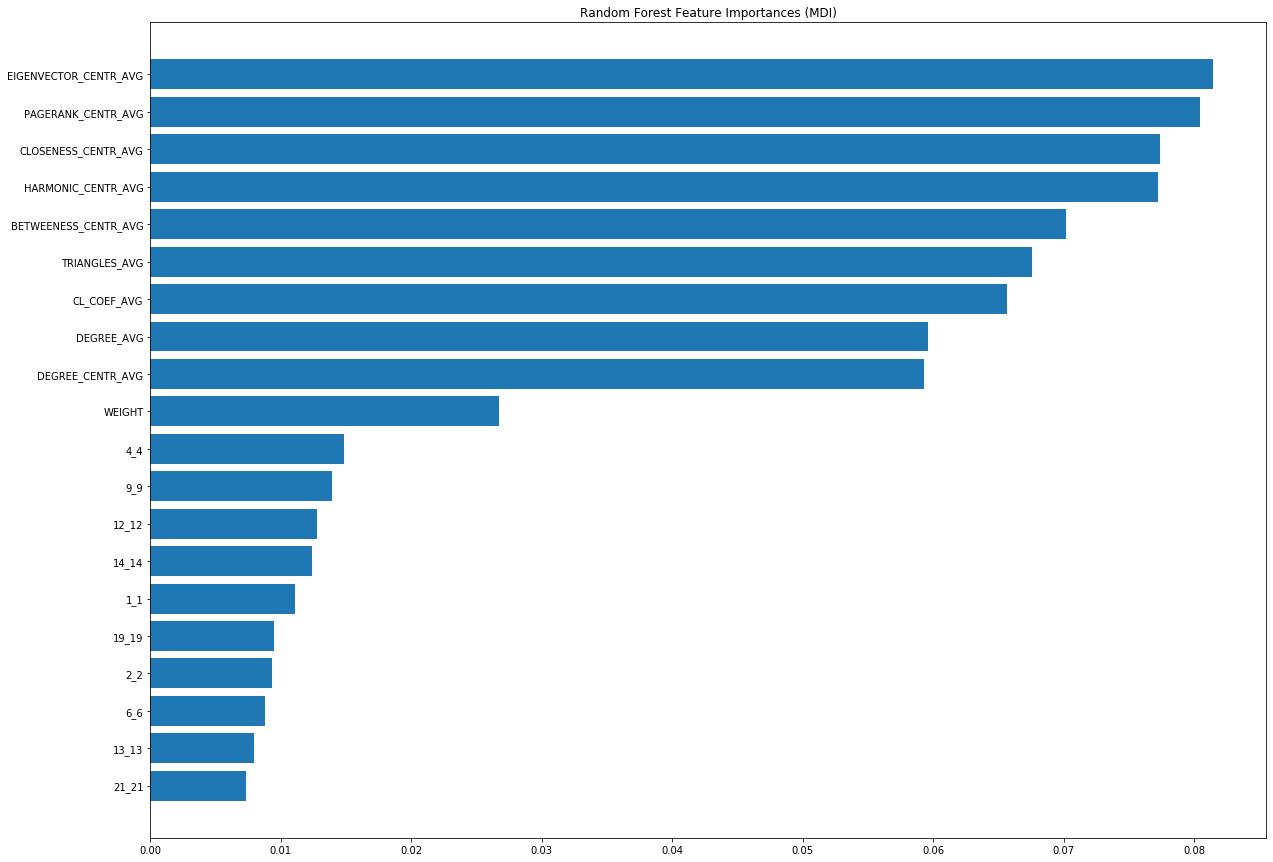

In [18]:
nbr_features = 20

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots(figsize=(20, 15))
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [19]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [20]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/feder/anaconda3/Library/bin/graphviz'

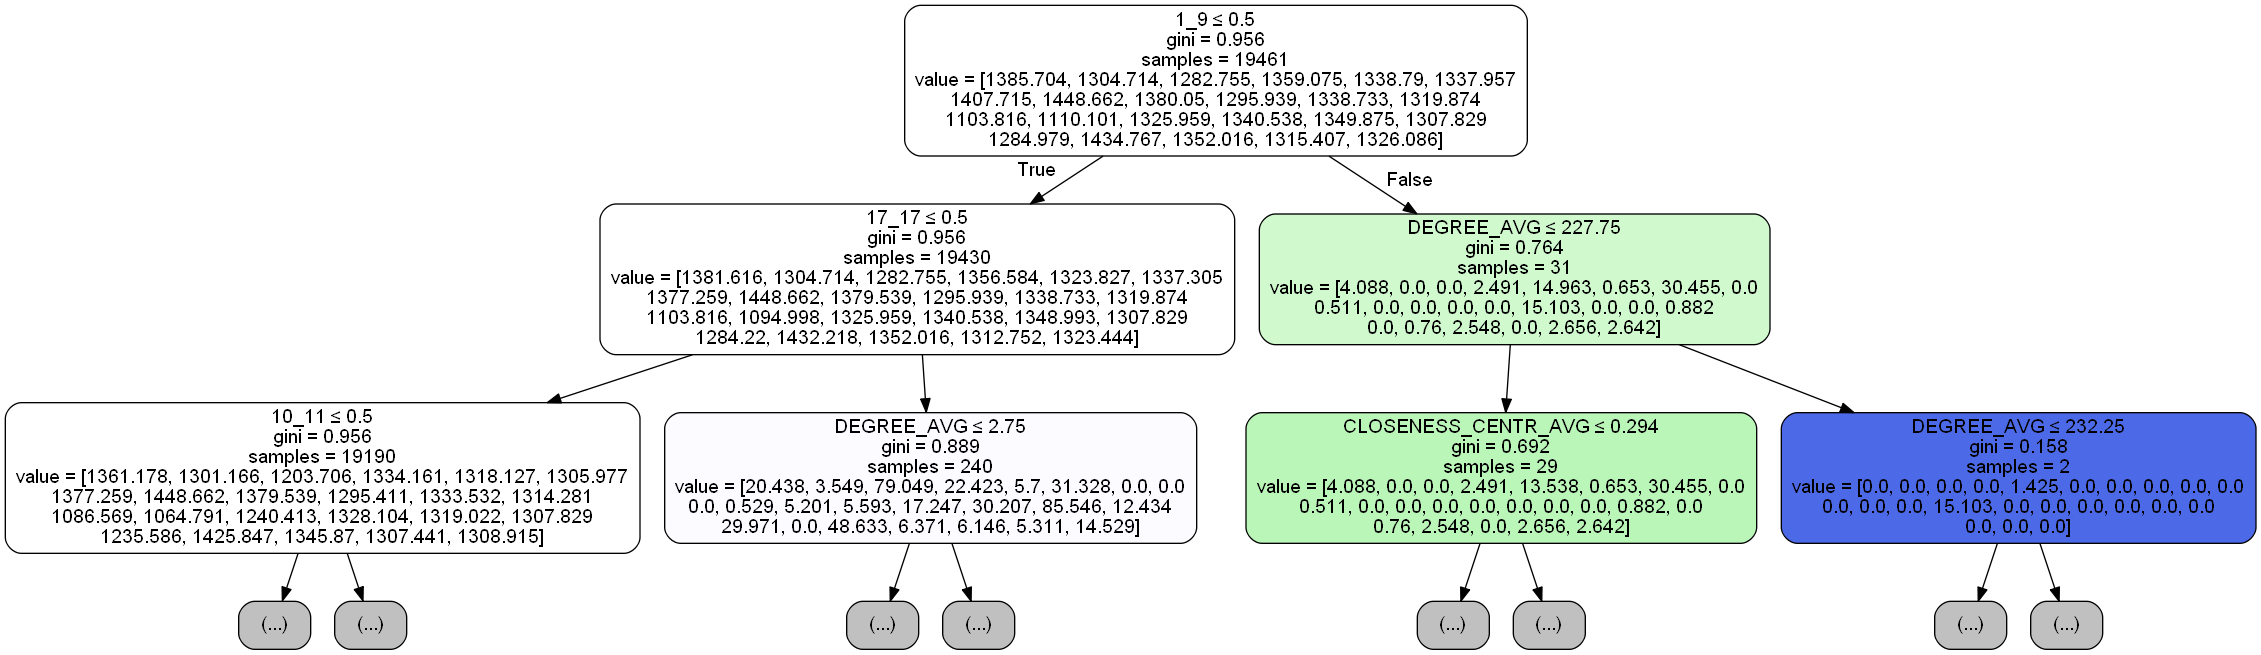

In [21]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                 
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=2)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

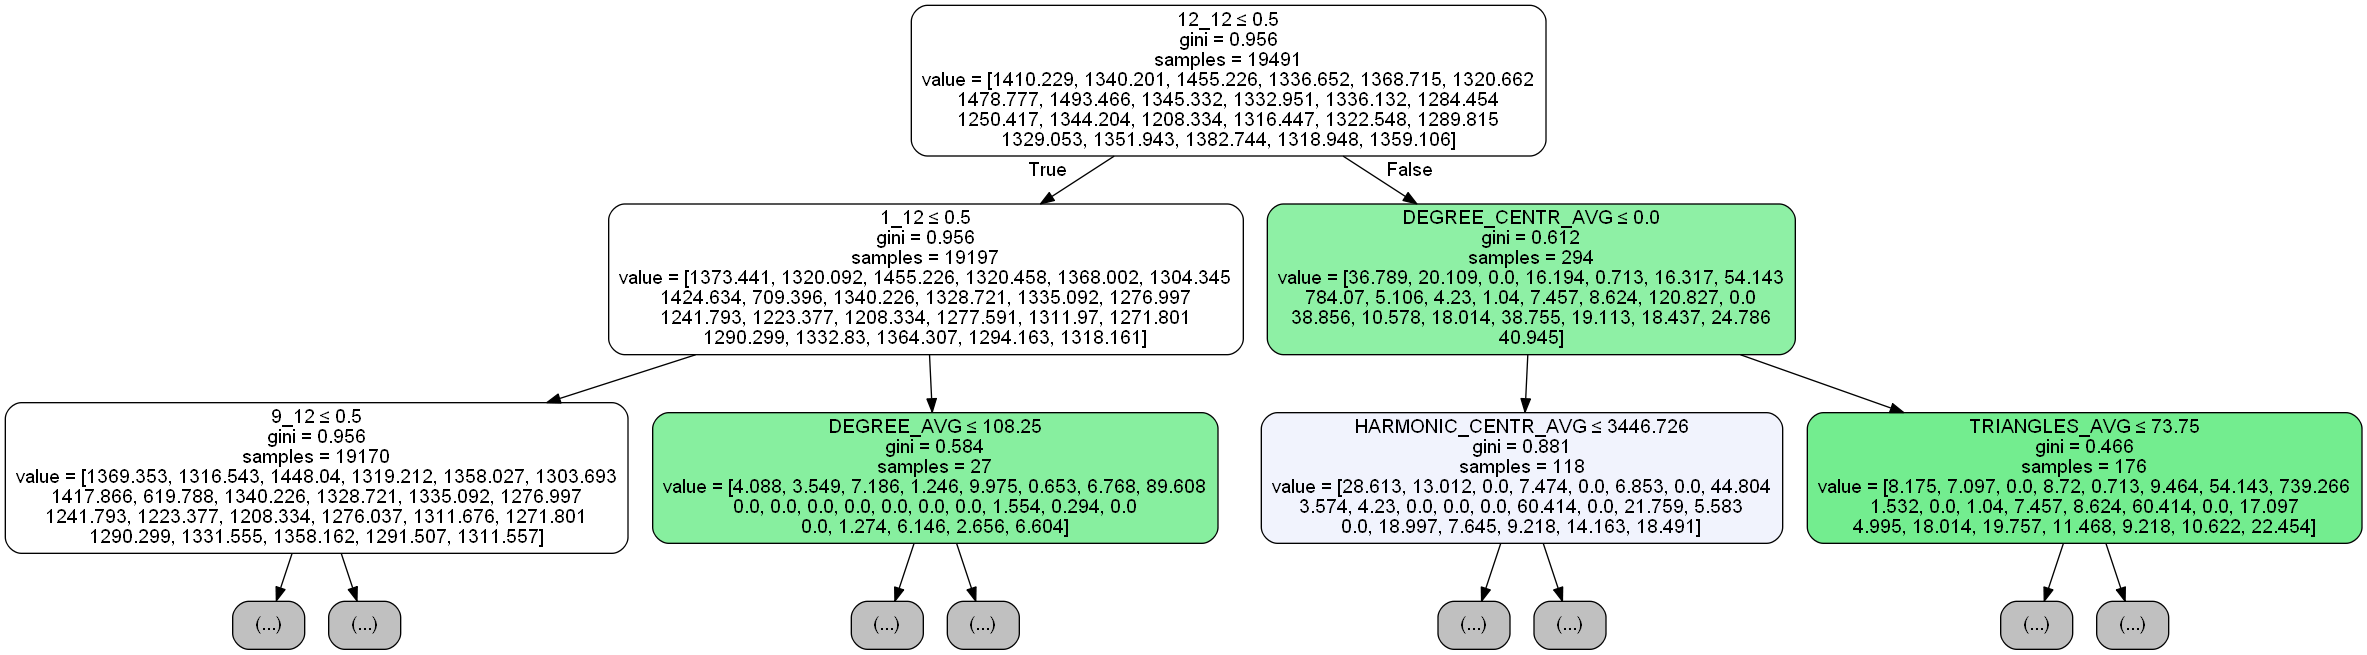

In [22]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=attributes, 
                                 
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=2)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# MACRO-SECTORS

In [95]:
for i in range (len(df)):
    
    if df["INDUSTRY"][i] == 96:
        df["INDUSTRY"][i] = 1    # informatica
    elif df["INDUSTRY"][i] == 3:
        df["INDUSTRY"][i] = 1
    elif df["INDUSTRY"][i] == 4:
        df["INDUSTRY"][i] = 1
    elif df["INDUSTRY"][i] == 5:
        df["INDUSTRY"][i] = 1
    elif df["INDUSTRY"][i] == 6:
        df["INDUSTRY"][i] = 1
    elif df["INDUSTRY"][i] == 8:
        df["INDUSTRY"][i] = 1
        
    if df["INDUSTRY"][i] == 11:
        df["INDUSTRY"][i] = 2    # Consulenza
    elif df["INDUSTRY"][i] == 41:
        df["INDUSTRY"][i] = 2
    elif df["INDUSTRY"][i] == 42:
        df["INDUSTRY"][i] = 2
    elif df["INDUSTRY"][i] == 43:
        df["INDUSTRY"][i] = 2
    elif df["INDUSTRY"][i] == 45:
        df["INDUSTRY"][i] = 2
    
    if df["INDUSTRY"][i] == 80:
        df["INDUSTRY"][i] = 3    # PR
    elif df["INDUSTRY"][i] == 137:
        df["INDUSTRY"][i] = 3
    elif df["INDUSTRY"][i] == 98:
        df["INDUSTRY"][i] = 3
    elif df["INDUSTRY"][i] == 97:
        df["INDUSTRY"][i] = 3
    elif df["INDUSTRY"][i] == 70:
        df["INDUSTRY"][i] = 3
    elif df["INDUSTRY"][i] == 116:
        df["INDUSTRY"][i] = 3
    elif df["INDUSTRY"][i] == 141:
        df["INDUSTRY"][i] = 3
        
    if df["INDUSTRY"][i] == 34:
        df["INDUSTRY"][i] = 4    # ALTRO
    elif df["INDUSTRY"][i] == 27:
        df["INDUSTRY"][i] = 4
    elif df["INDUSTRY"][i] == 135:
        df["INDUSTRY"][i] = 4
    elif df["INDUSTRY"][i] == 50:
        df["INDUSTRY"][i] = 4
    elif df["INDUSTRY"][i] == 48:
        df["INDUSTRY"][i] = 4
    

C:\Users\feder\anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\feder\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\feder\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\feder\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:




In [96]:
df

,NODE_A,NODE_B,WEIGHT,INDUSTRY,TRIANGLES_AVG,CL_COEF_AVG,DEGREE_AVG,DEGREE_CENTR_AVG,EIGENVECTOR_CENTR_AVG,PAGERANK_CENTR_AVG,...,9_26,9_27,9_28,9_29,9_30,9_32,9_33,9_35,9_36,9_9
0,PERMASTEELISA,SALINI SPA,2,4,133.0,0.131947,40.0,0.002690,7.853531e-03,0.000471,...,0,0,0,0,0,0,0,0,0,0
1,PERMASTEELISA,YOOX NET-A-PORTER GROUP,2,1,620.5,0.112316,98.0,0.006590,1.332161e-02,0.000831,...,0,0,0,0,0,0,0,0,0,0
2,PERMASTEELISA,SOMEC SPA,2,4,5.0,0.075758,7.5,0.000504,5.686113e-04,0.000076,...,0,0,0,0,0,0,0,0,0,0
3,PERMASTEELISA,RIZZANI DE ECCHER,2,2,8.5,0.309091,9.0,0.000605,6.138685e-04,0.000077,...,0,0,0,0,0,0,0,0,0,0
4,PERMASTEELISA,RAZORFISH HEALTHWARE,2,1,6.5,0.575758,7.5,0.000504,8.033997e-04,0.000067,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43914,NESMA TRADING CO. LTD.,NESMA & PARTNERS,2,4,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0
43915,SB COSTRUZIONI SRL,NESMA & PARTNERS,2,4,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0
43916,SB COSTRUZIONI SRL,TUNNELLING SRL,2,4,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0
43917,TUNNELLING SRL,NESMA & PARTNERS,2,4,3.0,1.000000,3.0,0.000202,6.797693e-23,0.000067,...,0,0,0,0,0,0,0,0,0,0


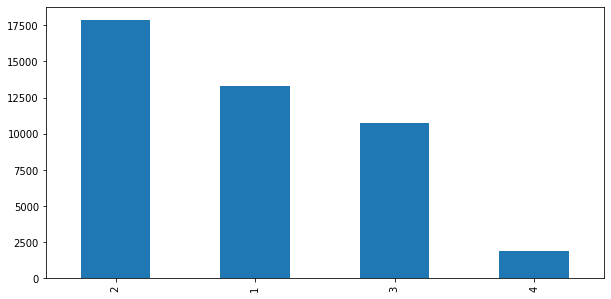

In [98]:
df['INDUSTRY'].value_counts().plot(kind='bar', 
                                   title='', figsize=(10, 5), )
plt.show()

## Split Training and Test

In [25]:
class_name = "INDUSTRY"

attributes = [col for col in df.columns if col != class_name]
#print (attributes)
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## GridSearch 

In [26]:
param_list = {'criterion': ["gini", "entropy"],
              'class_weight': ["balanced_subsample", "balanced"],
              #'n_estimators':[None] + list(np.arange(2, 300, 10))
             }
clf = RandomForestClassifier()
random_search = GridSearchCV(clf, param_list , scoring = "accuracy")
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7563752276867031
F1-score [0.74219044 0.82592122 0.69592281 0.47385272]
              precision    recall  f1-score   support

           1       0.74      0.74      0.74      3997
           2       0.81      0.85      0.83      5370
           3       0.70      0.69      0.70      3234
           4       0.61      0.39      0.47       575

    accuracy                           0.76     13176
   macro avg       0.72      0.67      0.68     13176
weighted avg       0.75      0.76      0.75     13176



In [27]:
clf

RandomForestClassifier(class_weight='balanced', criterion='entropy')

# Decision Tree

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

Accuracy 0.700136612021858
F1-score [0.68409316 0.77878083 0.63988834 0.39926403]
              precision    recall  f1-score   support

           1       0.68      0.69      0.68      3997
           2       0.78      0.78      0.78      5370
           3       0.64      0.64      0.64      3234
           4       0.42      0.38      0.40       575

    accuracy                           0.70     13176
   macro avg       0.63      0.62      0.63     13176
weighted avg       0.70      0.70      0.70     13176



# RANDOM FOREST 

In [30]:
Accuracy_Entropy= []
Accurcy_Tree = []

lista = [1,25,50,75,100,125,150,175,200,225,250,275,300]

for i in lista: 
        clf = RandomForestClassifier(n_estimators=i, class_weight='balanced', criterion='entropy')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Accuracy_Entropy.append((accuracy_score(y_test, y_pred)))
        Accurcy_Tree.append(0.700136612021858)
        
l = lista

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=l, y=Accuracy_Gini,
                    mode='lines',
                    name='Random Forest'))
fig.add_trace(go.Scatter(x=l, y=Accurcy_Tree,
                    mode='lines',
                    name='Decision Tree'))
fig.show()

In [36]:
clf = RandomForestClassifier(n_estimators=225, class_weight='balanced', criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

Accuracy 0.7607771706132362
F1-score [0.74788872 0.82849365 0.69878376 0.49736565]
              precision    recall  f1-score   support

           1       0.74      0.75      0.75      3997
           2       0.81      0.85      0.83      5370
           3       0.71      0.68      0.70      3234
           4       0.63      0.41      0.50       575

    accuracy                           0.76     13176
   macro avg       0.72      0.67      0.69     13176
weighted avg       0.76      0.76      0.76     13176



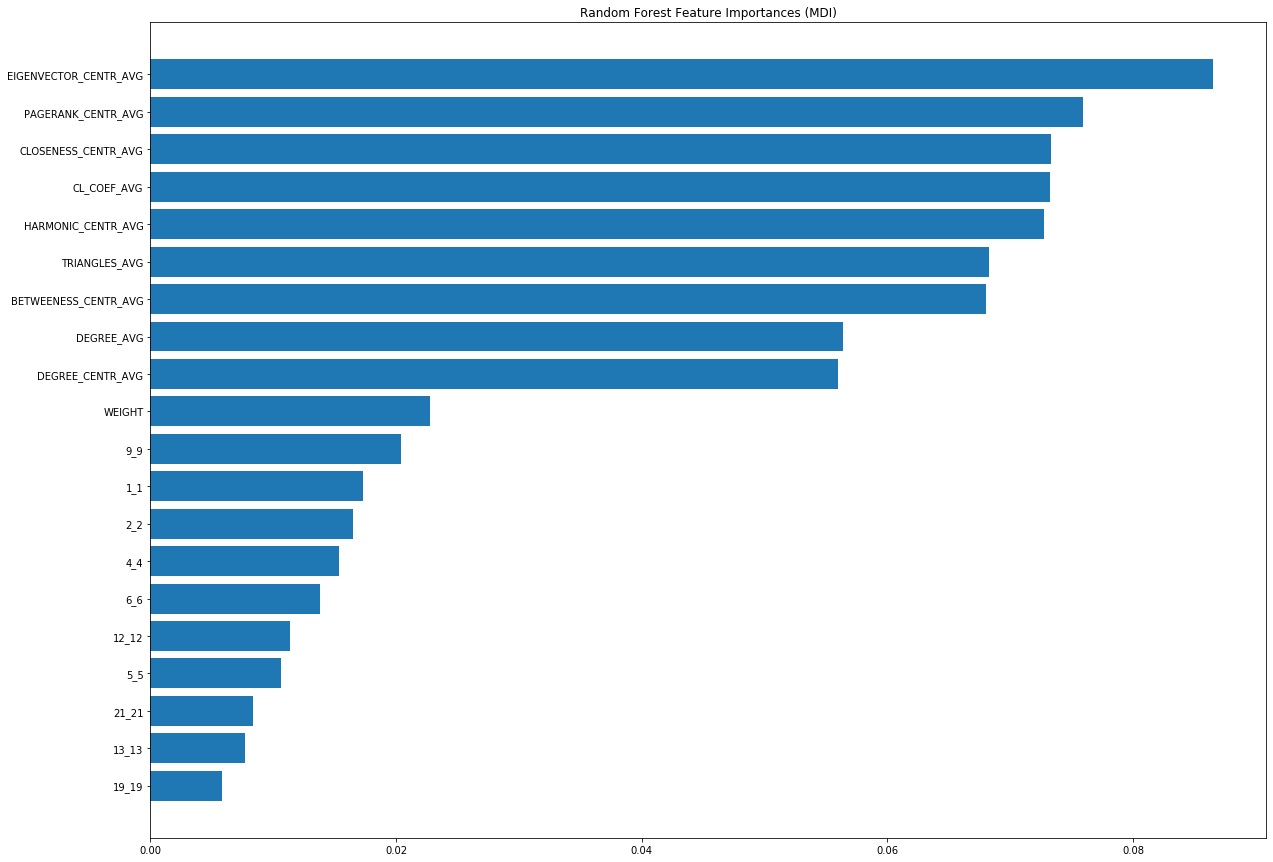

In [33]:
nbr_features = 20

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots(figsize=(20, 15))
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

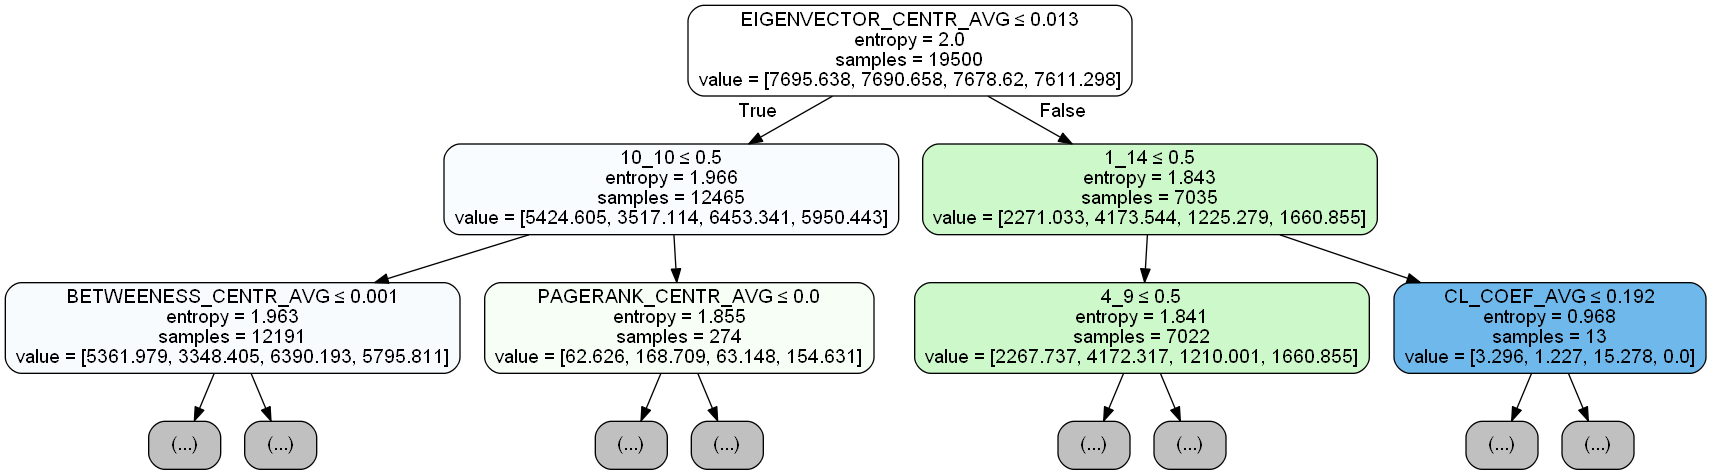

In [34]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                #class_names=['Occupata', "Non Occupata"], 
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=2)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

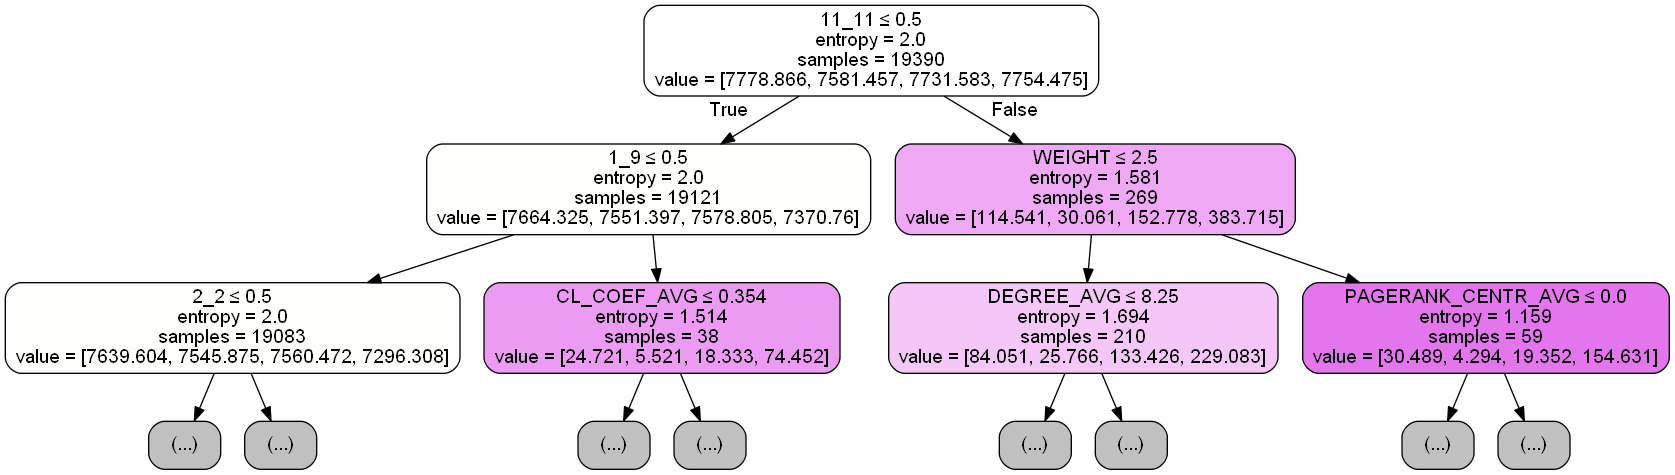

In [45]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=attributes, 
                               # class_names= ['', "Non Occupata"],
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=2)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())